# Which ML Algo are sensitive to Outlier
- Naive Bayes Classifier---- Not Sensitive
- SVM----------------------- Not Sensitivite
- Linear Regression--------- Sensitive
- Logistic Reg-------------- Sensitive
- Decision Tree------------- Not Sensitive
- Ensemble(RF, XGBoost,GB)-- Not Sensitive
- KNN----------------------- Not Sensitive
- KMeans-------------------- Sensitive
- Hierarchical-------------- Sensitive
- PCA----------------------- Sensitive
- Neural Network------------ Sensitive

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pylab


In [2]:
df = pd.read_csv("/home/dheeraj/my_projects/my_project_env/practice/EDA-FeatureEng-FeatureSelection-Prediction/Feature_Engineering/Dataset/titanic_train.csv", usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

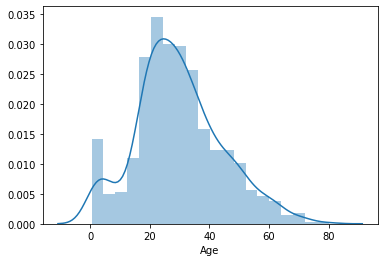

In [5]:
sns.distplot(df.Age.dropna())

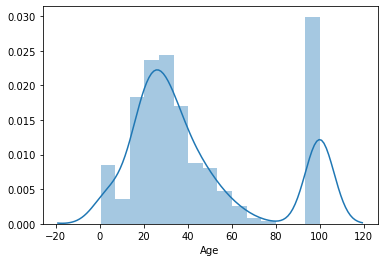

In [7]:
sns.distplot(df.Age.fillna(100))

### Guasian Plot

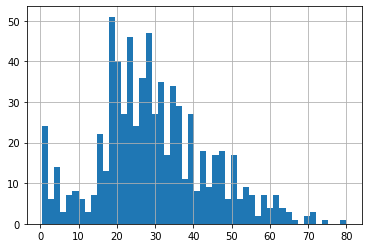

In [8]:
df.Age.hist(bins=50)

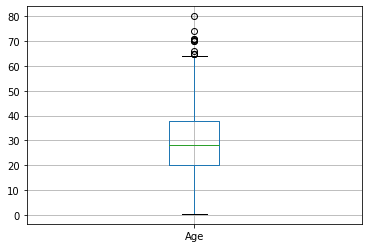

In [18]:
df.boxplot(column="Age")

In [20]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

## So in case of Guassian Distribution, consider value on extreme position as (mu + 3*sigma) as outlier

In [27]:
## Assuming Age follows Guassian Distribution,we'll calculate the boundary which differentiates the outliers


upper_boundary = df['Age'].mean() + 3*df.Age.std()
lower_boundary = df['Age'].mean() - 3*df.Age.std()
print(lower_boundary), print(upper_boundary)

-13.880374349943303
73.27860964406094


(None, None)

In [26]:
lower_bridge = df.Age.quantile(0.25) - (IQR*1.5)
upper_bridge = df.Age.quantile(0.75) + (IQR*1.5)
print(lower_bridge), print(upper_bridge)

-6.6875
64.8125


(None, None)

In [28]:
## Considering extreme outlier

lower_bridge = df.Age.quantile(0.25) - (IQR*3)
upper_bridge = df.Age.quantile(0.75) + (IQR*3)
print(lower_bridge), print(upper_bridge)

-33.5
91.625


(None, None)

## Feature is skewed

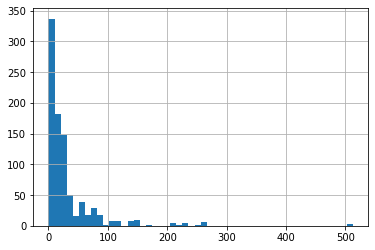

In [29]:
df.Fare.hist(bins=50)

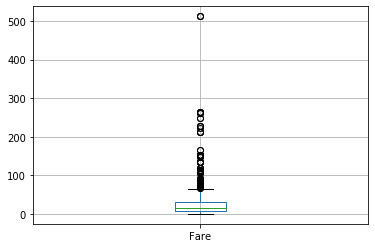

In [30]:
df.boxplot(column="Fare")

In [32]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## Since 'Fare' or dataset is skewed so we'll not check using Guassian distribution, instead we'll check for IQR

In [33]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)

In [34]:
lower_bridge = df.Fare.quantile(0.25) - (IQR*1.5)
upper_bridge = df.Fare.quantile(0.75) + (IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [35]:
## Considering extreme outlier

lower_bridge = df.Fare.quantile(0.25) - (IQR*3)
upper_bridge = df.Fare.quantile(0.75) + (IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [36]:
data = df.copy()

In [37]:
data.loc[df['Age']>=73, "Age"]=73

In [38]:
data.Age.max()

73.0

In [39]:
data.loc[df['Fare']>=100, "Fare"]=100

In [40]:
data.Fare.max()

100.0

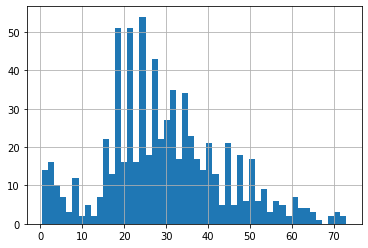

In [42]:
data.Age.hist(bins=50)

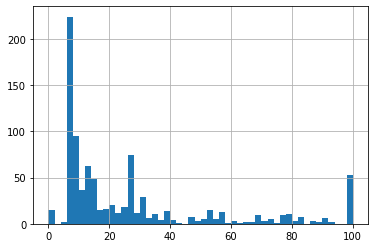

In [41]:
data.Fare.hist(bins=50)

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['Age', 'Fare']].fillna(0), data['Survived'], test_size=0.3)

In [47]:
## Logistic Reg
from sklearn.linear_model import LogisticRegression
logist = LogisticRegression()
logist.fit(x_train, y_train)
y_pred = logist.predict(x_test)
y_pred1 = logist.predict_proba(x_test)

from sklearn.metrics import accuracy_score, roc_auc_score

print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("Roc Aoc score: {}".format(roc_auc_score(y_test ,y_pred1[:,1])))

Accuracy score: 0.6940298507462687
Roc Aoc score: 0.7237208750815202


In [ ]:
## Ensemble tech
from sklearn.ensemble import RandomForestClassifier
randf = RandomForestClassifier()
randf.fit(x_train, y_train)
y_pred = randf.predict(x_test)
y_pred1 = randf.predict_proba(x_test)

from sklearn.metrics import accuracy_score, roc_auc_score

print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
print("Roc Aoc score: {}".format(roc_auc_score(y_test ,y_pred1[:,1])))